In [4]:
using Turing, Distributions
using ForwardDiff: Dual
using PyPlot, PyCall

In [ ]:
K = 10
N = 51

T = [[0.272545164 6.5637631e-37 7.93970182e-6 8.61092244e-5 0.165656847 0.287081146 0.000218659173 4.06806091e-13 0.274399041 5.09466694e-6]
 [0.0835696383 7.05396766e-6 0.206100213 1.52600546e-11 1.53908757e-8 6.5269808e-11 0.673013596 0.0193819808 0.0179275025 3.2272789e-18]
 [0.886728867 8.63212428e-7 3.94046562e-11 0.110467781 1.11735715e-6 2.12946427e-18 5.16880247e-8 0.000236340361 0.00111600188 0.00144897701]
 [8.16557898e-11 0.0168992485 6.27227283e-14 0.010767298 0.426756301 1.78050405e-9 6.41316248e-5 0.321159984 0.0369047216 0.187448314]
 [0.130652141 4.70465408e-6 0.000473601393 0.0378509164 9.06618543e-10 0.000778622816 0.00029383779 0.829914494 8.69688804e-26 3.16817317e-5]
 [0.223054659 0.288152163 7.35806925e-19 0.0185562602 1.73073908e-8 0.400936069 1.17437994e-12 0.0443974641 0.0249033671 7.2202285e-18]
 [4.78064507e-16 0.320444079 0.00385904296 1.26156421e-9 0.00688364264 0.00447186979 0.156660567 0.169796226 0.333780163 0.00410440864]
 [4.84470444e-13 2.5025163e-14 2.78748146e-7 0.00245132866 3.03033036e-12 0.00284425237 8.49830551e-7 6.60111797e-8 0.994702713 5.11768273e-7]
 [0.16839645 1.80280379e-7 5.68958062e-11 0.134838199 0.00020810431 0.0861188042 0.0517409105 0.361825373 3.31239961e-11 0.196871978]
 [0.0474764005 1.16126593e-6 5.96036112e-8 0.00128470373 1.30134792e-6 0.0374283978 0.310068428 2.27075277e-19 0.00647484474 0.597264703]]

obs = [ 0.0,   7.72711051,   2.76189162,   8.8216901 ,
        10.80174329,   8.87655587,   0.47685358,   9.51892527,
         7.82538035,   5.52629325,  10.75167786,   5.94925434,
        -0.96912603,   1.65160838,   1.65005965,  -0.99642713,
         7.37803004,   5.40821392,   9.44046498,   8.51761132,
         9.76981763,   5.980154  ,   9.19558142,   5.33965621,
         6.2388448 ,   2.77755879,   6.67731151,   8.52411613,
        11.31057577,   8.11554144,   6.64705471,   8.02025435,
         9.84003587,   3.03943679,  -2.93966727,   2.04372567,
        -0.93734763,   3.66943525,   6.12876571,  -2.07758649,
         1.10420963,  -0.23197037,   3.64908206,  14.14671815,
         6.96651114,   7.28554932,   9.06049355,   6.54246834,
        11.22672275,   7.41962631,   8.45635411 ]

# means   = zeros(Float64,K)
initial = ones(Float64, K)/K

In [ ]:
@model bayeshmm(y) = begin
    s = tzeros(Int64, N)
    m = tzeros(Dual, K)
    #T = Array{Array}(K)
    for i = 1:K
        m[i] ~ Normal(0, 10)
        # T[i] ~ Dirichlet(ones(K))
    end
    s[1] ~ Categorical(initial)
    for i = 2:N
        s[i] ~ Categorical(vec(T[s[i-1],:]))
        # s[i] ~ Categorical(vec(T[s[i-1]]))
        y[i] ~ Normal(m[s[i-1]], 4)
    end
    res = m[s[:]]
    return(res, s, m)
end

In [40]:
g = Gibbs(300, HMC(2, 0.2, 5, :m), PG(100,2, :s))
c = @sample(bayeshmm(obs), g);

[Gibbs]: Finshed within 224.90055108070374 seconds
224.894381 seconds (181.29 M allocations: 8.222 GB, 1.56% gc time)


In [41]:
s = MambaChains(chain);

In [42]:
describe(s)

Iterations = 1:300
Thinning interval = 1
Chains = 1
Samples per chain = 300

Empirical Posterior Estimates:
          Mean        SD       Naive SE      MCSE        ESS    
 m[1]   1.7398017 2.13364888 0.123186275 0.810479137   6.9304626
 m[2]   7.1381852 1.94950883 0.112554945 0.253867608  58.9706390
 m[3]   6.0207986 1.84454729 0.106494987 0.637154815   8.3808805
 m[4] -21.0671134 6.35020779 0.366629418 3.683325904   2.9723201
 m[5]  -4.5757735 3.31643627 0.191474537 1.386221773   5.7237134
 m[6]   4.4128716 2.28633762 0.132001764 0.439162324  27.1038243
 m[7]   2.0924385 6.57370544 0.379533061 4.257837727   2.3836488
 m[8]   7.7558412 1.70372454 0.098364582 0.556724866   9.3652100
 m[9]   6.0645280 1.58829259 0.091700115 0.369387933  18.4882417
m[10]   8.2571142 3.83929804 0.221661976 2.189088707   3.0759334
 s[1]   1.4300000 1.13551662 0.065559083 0.343947670  10.8993913
 s[2]   5.2233333 2.86720394 0.165538096 0.343139104  69.8195015
 s[3]   5.4033333 3.36030172 0.194007110 0.9097

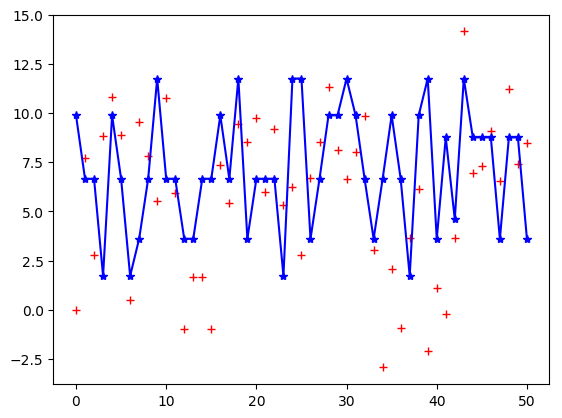

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x329b9c4d0>

In [49]:
m = Turing.realpart(c[:m][200]);
s = Turing.realpart(c[:s][200])
PyPlot.plot(obs, linestyle="None", marker="+", color = "r")
PyPlot.plot(m[s], linestyle="-", marker="*", color = "b")